# Data preparation


In [ ]:
# The e-commerce-customers dataset contains the following variables:

# Email (object/string)
# Address (object/string)
# Avatar (object/string)
# Avg. Session Length (float)
# Time on App (float)
# Time on Website (float)
# Length of Membership (float)
# Yearly Amount Spent (float)

# The main objective is to find the best linear regression model for predicting the ‘Yearly Amount Spent’.
# You are expected to briefly explain which model may be considered the best. Moreover, 
# you should explain how well a model satisfies the key assumptions of linear regression using diagnostic plots.

In [34]:
#@title Data
# Load a csv file
import pandas as pd

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/sdimitrijevic/ada-ml/main/datasets/e-commerce-customers.csv'

df = pd.read_csv(url)

# from a file
# df = pd.read_csv("datasets\e-commerce-customers.csv")

df.shape

(500, 8)

In [35]:
# Detaset variables info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
# Checking if the dataset has missing values
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
# After checking sum of nulls or Nas, and the visual inspection of the dataset, 
# it can be concluded that there is no missing values in the dataset.
# Otherwise, we should apply some of the methods for addressing missing values.

In [ ]:
#@title Checking data
# First 5 rows
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
# Last 5 rows
df.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [ ]:
# Removing non-numerical variables because they are not relevant for Linear regression
df=df.drop(['Email','Address','Avatar'], axis=1)

In [ ]:
# Checking variables after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [ ]:
# Describing numerical variables
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<Axes: >

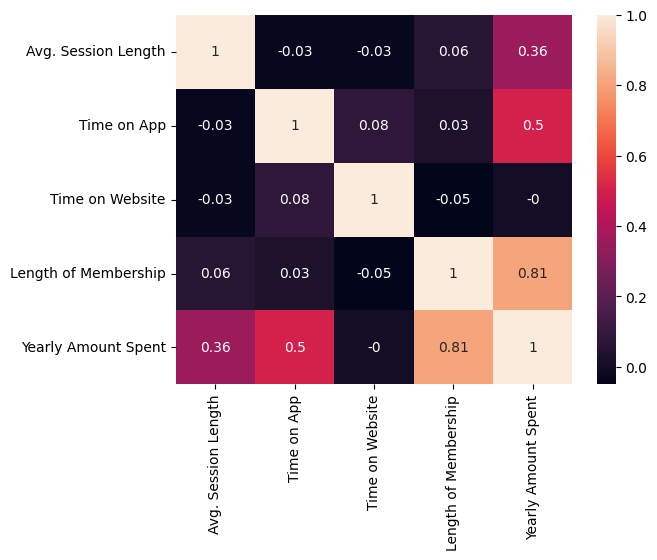

In [ ]:
#@title Data visualization

# Visualizing correlation matrics
correlation_matrix = df.corr().round(2)

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# To fit a linear regression model, we select features with a high correlation with the target variable Yearly Amount Spent.
# By looking at the correlation matrix we can see that Length of Membership has a strong positive correlation with Yearly Amount Spent
# (0.81). In addition, Time on App has a borderline moderate correlation of 0.5. 	

# An important point in selecting features for a linear regression model is to check for multi-co-linearity. 
# In this dataset, there are no correlated pairs of features. If there are some correlated feature pairs,
# we should not select both features together for training the model.

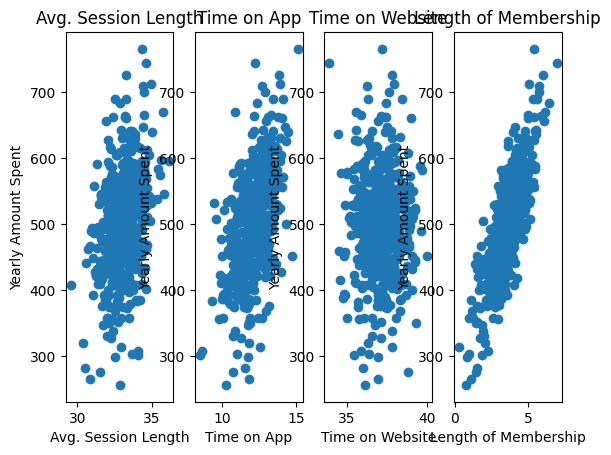

In [ ]:
# Visualizing the change in the variables
import matplotlib.pyplot as plt

features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
target = df['Yearly Amount Spent']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Yearly Amount Spent')

In [ ]:
# Based on the visualization, Length of Membership has the most linear relationship with 
# the target variable.

# Linear Regression Models


In [ ]:
#@title Linear Regression 1
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Splitting data
from sklearn.model_selection import train_test_split

# The first model is built using all numerical variables as predictors.

x1 = df.drop(['Yearly Amount Spent'], axis=1)
y1 = df['Yearly Amount Spent']

In [ ]:
# Splitting train and test data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 5)

# Shape of the train and test sets
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(400, 4)
(100, 4)
(400,)
(100,)


In [ ]:
# Building and fitting the linear regression model using statsmodels.api
## sm.add_constant adds an intercept, which is not included by default
lr1 = sm.OLS(y1_train, sm.add_constant(x1_train))
lr1_results = lr1.fit()
print(lr1_results.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     6246.
Date:                 Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                         13:11:57   Log-Likelihood:                -1487.2
No. Observations:                  400   AIC:                             2984.
Df Residuals:                      395   BIC:                             3004.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [ ]:
# Checking for mutlicollinearity

# Collinearity refers to the situation when 2 or more predictors are highly related to 
# one another. A simple way to detect collinearity is to look at the correlation matrix
# of the predictors. However, it is possible that collinearity exist between 3 or
# more variables, even if no pair of variables has a particularly high correlation.
# This is known as multicollinearity. One of the assumptions of the multiple linear
# regression is the absence of the multicollinearity. 

# One way of checking multicollinearity is to compute the Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif_lr1 = pd.DataFrame()

# Adding const because the algorithm requires it
x1_train_with_const = sm.add_constant(x1_train)
vif_lr1["VIF Factor"] = [variance_inflation_factor(x1_train_with_const.values, i) for i in range(x1_train_with_const.shape[1])]
vif_lr1["features"] = x1_train_with_const.columns

# As a rule of thumb, variables having a square root of VIFs > 2 are problematic.

# Finding square roots of VIFs
vif_lr1['VIF Factor square root']=vif_lr1['VIF Factor']**(1/2)
vif_lr1.drop(0, axis = 0).sort_values('VIF Factor square root')

,VIF Factor,features,VIF Factor square root
4,1.007767,Length of Membership,1.003876
2,1.011424,Time on App,1.005696
1,1.014334,Avg. Session Length,1.007142
3,1.017951,Time on Website,1.008935


In [ ]:
# If there are variables with a square root of VIFs > 2, it should be proceded by
# exluding variables with the highest VIF value one by one.
# Since this is not the case, we can get predictions and evaluate the model.

In [ ]:
# Predicting values - test dataset
predicted_y1_test = lr1_results.predict(sm.add_constant(x1_test))

In [ ]:
# Comparing the predicted and actual values
df_compare4 = pd.DataFrame({'Actual': y1_test.to_numpy().flatten(), 'Predicted': predicted_y1_test})
df_compare4.head()

,Actual,Predicted
241,571.471034,559.283300
448,478.584286,478.505208
75,478.719357,455.806316
212,536.130897,538.428734
481,497.389558,480.611861


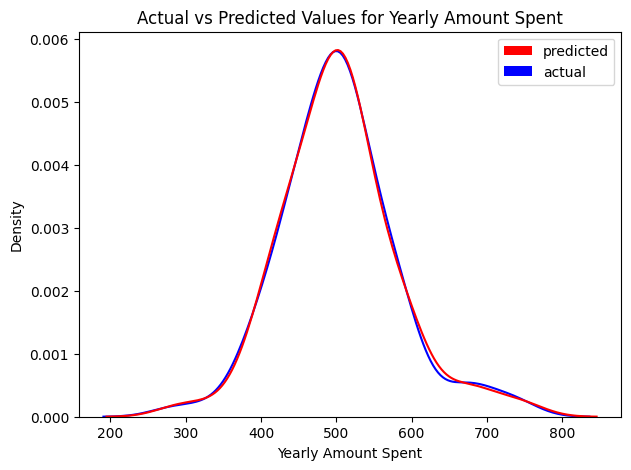

In [ ]:
# Density plot - the predicted against actual values
import matplotlib.patches as  mpatches

plt.figure(figsize=(7, 5))

ax1 = sns.kdeplot(y1_test, color="b", label="Actual Value", legend=True)
sns.kdeplot(predicted_y1_test, color="r", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Predicted Values for Yearly Amount Spent')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Density')

handles = [mpatches.Patch(facecolor='r', label="predicted"),
           mpatches.Patch(facecolor='b', label="actual")]
plt.legend(handles=handles)

plt.show()
plt.close()

In [ ]:
#@title Linear Regression 1 Evaluation

# Model evaluation for the test set
from sklearn import metrics

# Computing (adjusted) r-squared with formulas from the theory
y1_test_array = y1_test.to_numpy().flatten()

RSS1 = sum((y1_test_array-predicted_y1_test)**2)       
TSS1 = sum((y1_test_array-np.mean(y1_test_array))**2)     
r_squared1 = 1 - RSS1/TSS1
adj_r_squared1 = 1 - (1-r_squared1)*(len(y1_test_array)-1)/(len(y1_test_array)-x1_test.shape[1]-1)

# another way to calculate r_squared (r2) using sklearn.metrics
# r_squared1 = r2_score(y1_test, predicted_y1_test)

# Using metrics api
mae1 = metrics.mean_absolute_error(y1_test, predicted_y1_test)
mse1 = metrics.mean_squared_error(y1_test, predicted_y1_test)
rmse1 = np.sqrt(metrics.mean_squared_error(y1_test, predicted_y1_test))

print('R2:', r_squared1)
print('Adjusted R2:', adj_r_squared1)
print('Mean Absolute Error:', mae1)  
print('Mean Squared Error:', mse1)  
print('Root Mean Squared Error:', rmse1)

R2: 0.9836351264700077
Adjusted R2: 0.9829460791634818
Mean Absolute Error: 7.4245613450284225
Mean Squared Error: 95.7855086364497
Root Mean Squared Error: 9.787007133769226


In [ ]:
# R2 and Adjusted R2 are very high. This means that the largest part of the variance
# of the dependent variable is explained by the independent variables of the model. 

# If the data points are very close to the regression line, then the model accounts
# for a good amount of variance, thus resulting in a high R² value. However, a good
# model can have low R² value and a biased model can have a high R² value as well.
# That is the reason you should make use of residual plots.

In [ ]:
# To get a perspective of how large RMSE is, the mean value of the response variable on the test
# set is calculated.

# Calculating the mean of the test medv
test_mean1 = y1_test.mean()

# Then, RMSE is compared with the mean of test medv
print(rmse1/test_mean1)

# About 2% is a small error.

0.019450909698609083


In [ ]:
# If there are several models, the metrics should be compared, as well as the number of
# variables used in a model. If models have similar values of the metrics, a simpler model
# is the prefered one.

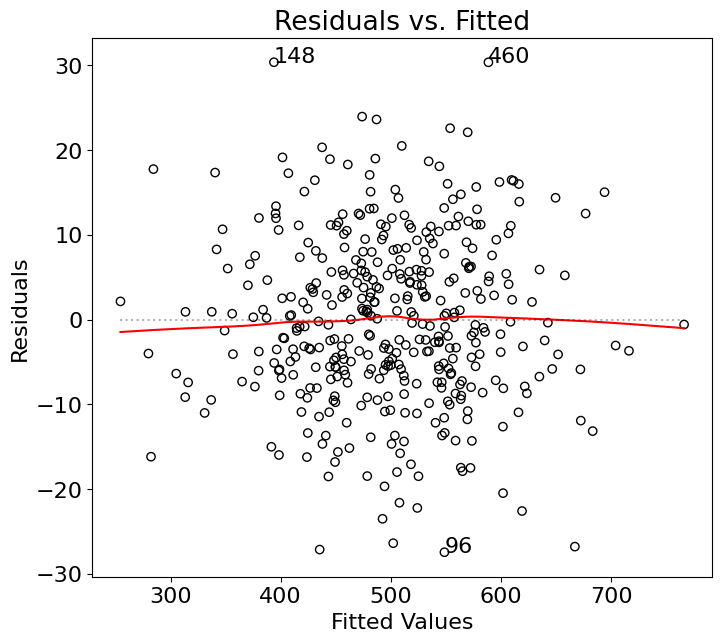

In [ ]:
#@title Diagnostics plots
# Plotting residuals vs. fitted values for checking the linearity assumption between
# the dependent and independent variables
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statsmodels.nonparametric.smoothers_lowess import lowess

lr1_residuals = lr1_results.resid
lr1_fitted = lr1_results.fittedvalues
lr1_smoothed = lowess(lr1_residuals, lr1_fitted)
lr1_top3 = abs(lr1_residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(lr1_fitted, lr1_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(lr1_smoothed[:,0],lr1_smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(lr1_fitted),max(lr1_fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in lr1_top3.index:
    ax.annotate(i,xy=(lr1_fitted[i], lr1_residuals[i]))

plt.show()

# If residuals are equally spread around the line, without distinct patterns, that
# is an indication that there are no non-linear relationships, i.e., that the
# linearity assumption is satisfied. In this case, the plot indicate a linear
# relationship between the predictors and the response variable.

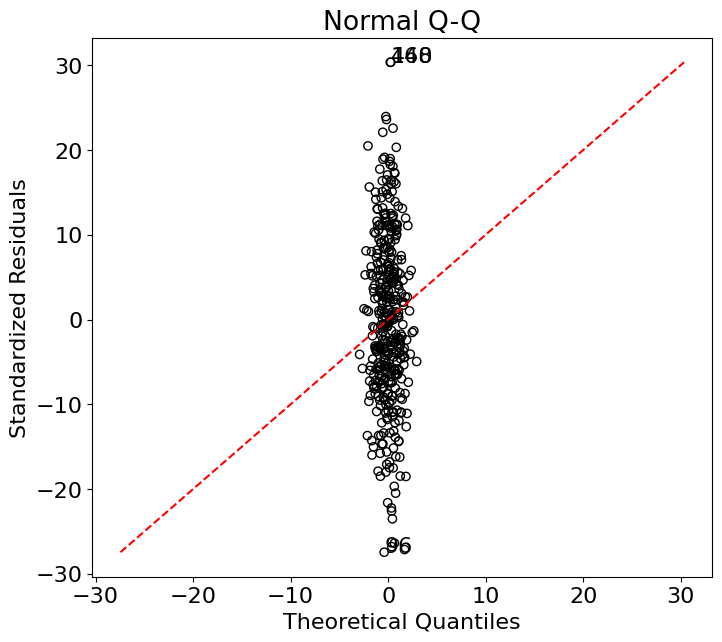

In [ ]:
# Quantile - Quantile (Q-Q) plot for checking if the residuals follow a normal distribution
import scipy.stats as stats

sorted_lr1_residuals = pd.Series(lr1_results.get_influence().resid_studentized_internal)
sorted_lr1_residuals.index = lr1_results.resid.index
sorted_lr1_residuals = sorted_lr1_residuals.sort_values(ascending = True)
df_qq = pd.DataFrame(lr1_residuals)
df_qq.columns = ['sorted_lr1_residuals']
df_qq['theoretical_quantiles'] = stats.probplot(df_qq['sorted_lr1_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df_qq['sorted_lr1_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df_qq['theoretical_quantiles']
y = df_qq['sorted_lr1_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df_qq['theoretical_quantiles'].loc[val],df_qq['sorted_lr1_residuals'].loc[val]))
plt.show()

# The residuals should be lined well on the straight dashed line. In this case,
# there is a deviation from the diagonal, and therefore, from the normal distribution.

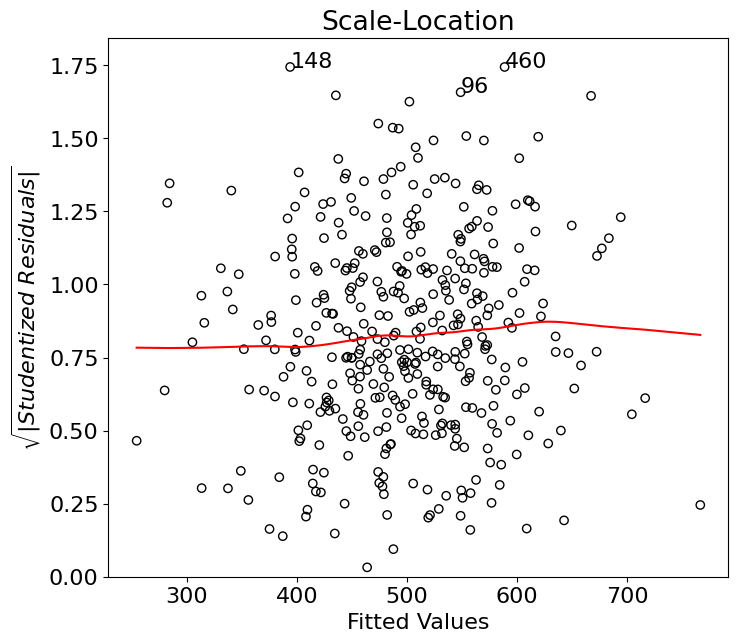

In [ ]:
# Scale - Location plot for checking the assumption of the equal variance of the
# residuals, homoskedasticity

lr1_residuals = lr1_results.get_influence().resid_studentized_internal
lr1_fitted = lr1_results.fittedvalues
sqrt_lr1_residuals = pd.Series(np.sqrt(np.abs(lr1_residuals)))
sqrt_lr1_residuals.index = lr1_results.resid.index
smoothed = lowess(sqrt_lr1_residuals,lr1_fitted)
top3 = abs(sqrt_lr1_residuals).sort_values(ascending = False)[:3]

fig, ax = plt.subplots()
ax.scatter(lr1_fitted, sqrt_lr1_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_lr1_residuals)+0.1)
for i in top3.index:
    ax.annotate(i,xy=(lr1_fitted[i],sqrt_lr1_residuals[i]))
plt.show()

# It is good if the data points seem to be randomly spread above and below the
# line. In this case, the variance is randomly spread.

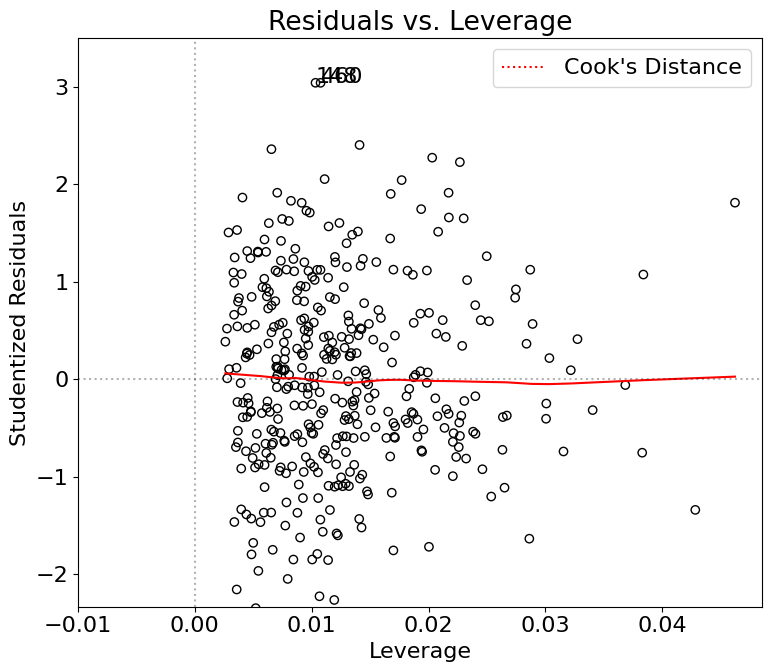

In [ ]:
# Residuals vs. Leverage for spotting the presence of high leverage points

lr1_residuals = pd.Series(lr1_results.get_influence().resid_studentized_internal)
lr1_residuals.index = lr1_results.resid.index
df_residuals = pd.DataFrame(lr1_residuals)
df_residuals.columns = ['lr1_residuals']
df_residuals['leverage'] = lr1_results.get_influence().hat_matrix_diag
smoothed = lowess(df_residuals['lr1_residuals'],df_residuals['leverage'])
sorted_lr1_residuals = abs(df_residuals['lr1_residuals']).sort_values(ascending = False)
top3 = sorted_lr1_residuals[:3]

fig, ax = plt.subplots()
x = df_residuals['leverage']
y = df_residuals['lr1_residuals']
xpos = max(x)+max(x)*0.01  
ax.scatter(x, y, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
ax.set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
ax.set_xlim(-0.01,max(x)+max(x)*0.05)
plt.tight_layout()
for val in top3.index:
    ax.annotate(val,xy=(x.loc[val],y.loc[val]))

cooksx = np.linspace(min(x), xpos, 50)
p = len(lr1_results.params)
poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax.legend()
plt.show()

# High leverage points can be typically spotted in the corners, that is, beyond the
# dashed line that indicated the Cook's distance (they have high Cook's distance
# score). Here, there is no high leverage points.